# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [150]:
import pandas as pd
import numpy as np

In [151]:
student_data = pd.read_csv('students-data.csv', sep=';')
print (student_data.shape)
#print (student_data)
student_data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [152]:
student_data.index.name = "number"
print (student_data.head())
print (student_data.describe())

       school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

        ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
number  ...                                                                 
0       ...      4        3      4     1     1      3        6   5   6   6  
1       ...      5        3      3     1     1      3        4   5   5   6  
2       ...      4        3      2     2     3      3       10   7   8  10  
3       ...      3        2      2     1     1 

In [153]:
# check if any missing values
student_data_na = student_data[student_data.isna().any(axis=1)]
student_data_na

# No missing values found. checked entire data set as well. even count in describe is same.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,


### No Missing value

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [154]:
print (student_data.dtypes)
print ('*******data types excluding numerical****')
print (student_data.select_dtypes(exclude='int64').columns)
print (student_data.select_dtypes(include='object').columns)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
*******data types excluding numerical****
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
Index(['school', 'sex', 'addr

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [155]:
print (student_data.var())

print ('******* variance less than 1******')
print (student_data.var() < 1)


age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64
******* variance less than 1******
age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool


In [156]:
# Create an array of columns names to be dropped 
colnames_lowvar = student_data.var() < 1
dropcol = colnames_lowvar.index [colnames_lowvar == True]
dropcol

Index(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], dtype='object')

In [157]:
#pass the array containing column names to be dropped
student_data_updated = student_data.drop(dropcol, axis=1)

#validate updated data frame
print (student_data_updated.columns)
print (student_data_updated.shape)
print (student_data_updated.head())


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
(395, 27)
       school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

        ... higher internet romantic goout Walc health absences  G1  G2  G3  
number  ...                        

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [158]:
from sklearn import preprocessing

In [159]:
le = preprocessing.LabelEncoder()

In [160]:
# create an array of object columns

colnames_object_temp = student_data_updated.dtypes == 'object'
colnames_object = colnames_object_temp.index [colnames_object_temp == True]
colnames_object

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [161]:
# loop through all the object columns to transform data


for col in colnames_object:
    student_data_updated[col] = le.fit_transform(student_data_updated[col])
    print ('****col****', col)
    #print (student_data_updated[col])

student_data_updated.head()

****col**** school
****col**** sex
****col**** address
****col**** famsize
****col**** Pstatus
****col**** Mjob
****col**** Fjob
****col**** reason
****col**** guardian
****col**** schoolsup
****col**** famsup
****col**** paid
****col**** activities
****col**** nursery
****col**** higher
****col**** internet
****col**** romantic


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [162]:
# convert the grade into 0/1 as per definition provided
student_data_updated ["G1"] = student_data_updated["G1"].map (lambda x: 1 if x>10 else 0)
student_data_updated ["G2"] = student_data_updated["G2"].map (lambda x: 1 if x>10 else 0)
student_data_updated ["G3"] = student_data_updated["G3"].map (lambda x: 1 if x>10 else 0)

print (student_data_updated.head())


#student_data_updated (np.where(student_data_updated >= 10, 1, 0), columns='G1')

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

        ...  higher  internet  romantic  goout  Walc  health  absences  G1  \
number  ...                                                                  
0       ...       1         0         0      4     1       3         6   0   
1       ...       1         1         0      3     1       3         4   0   
2       ...       1         1         0      2     3       3        10   0   
3       ...       1         1         1      2     1    

# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [163]:
#create target variable dataframe
y = student_data_updated['G3']

# Create Independent variables dataframe by excluding G3
X = student_data_updated.drop('G3',axis=1)


print ('X Shape', X.shape)
print ('y Shape', y.shape)
print (y.head())
print (X.head())

X Shape (395, 26)
y Shape (395,)
number
0    0
1    0
2    0
3    1
4    0
Name: G3, dtype: int64
        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

        ...  nursery  higher  internet  romantic  goout  Walc  health  \
number  ...                                                             
0       ...        1       1         0         0      4     1       3   
1       ...        0       1         1         0      3     1       3   
2       ...        1       1         1         0      2 

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300/395, random_state=0)

print ('X train', X_train.shape)
print ('X test', X_test.shape)
print ('y train', y_train.shape)
print ('y test', y_test.shape)

# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [164]:
from sklearn.linear_model import LogisticRegression

mylgr = LogisticRegression ()

#train with training data
clf = mylgr.fit(X_train, y_train)

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [165]:
from sklearn.metrics import accuracy_score


In [166]:
#score = mylgr.score(X_test, y_test)
#score
#y_test_pred = mylgr.predict(X_test)

#check accuracy for training data
score_train = accuracy_score (y_train,clf.predict(X_train))

#check accuracy for test data
score_test = accuracy_score (y_test,clf.predict(X_test))

print ('score_train - ', score_train)
print ('score_test - ', score_test)

score_train -  0.9366666666666666
score_test -  0.9157894736842105


# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [167]:
intercept = clf.intercept_
print (intercept)

[0.27602091]


# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [168]:
coef = clf.coef_
coef

print (X.columns)

print (coef)




Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')
[[-1.11096208  0.00769093 -0.12285684  0.3531555  -0.10187781 -0.44372025
   0.14826679  0.06616815 -0.02593877 -0.14215909 -0.22454956 -0.29058669
   0.59701044 -0.02375349 -0.02045713 -0.05349466 -0.87208751  0.22450923
   0.51956278  0.57785254 -0.03065845 -0.1348485  -0.00826927  0.01434583
   2.14579569  3.67355571]]


In [169]:

coeff_df = pd.DataFrame(coef,columns=X.columns)
coeff_df
coeff_df_new = coeff_df.transpose()

print ('***coefficients of the model***')
print (coeff_df.transpose())

print ('maximum impact coefficient -', coeff_df_new.max())
print ('maximum impact independent variable is G2')

***coefficients of the model***
                   0
school     -1.110962
sex         0.007691
age        -0.122857
address     0.353156
famsize    -0.101878
Pstatus    -0.443720
Medu        0.148267
Fedu        0.066168
Mjob       -0.025939
Fjob       -0.142159
reason     -0.224550
guardian   -0.290587
schoolsup   0.597010
famsup     -0.023753
paid       -0.020457
activities -0.053495
nursery    -0.872088
higher      0.224509
internet    0.519563
romantic    0.577853
goout      -0.030658
Walc       -0.134848
health     -0.008269
absences    0.014346
G1          2.145796
G2          3.673556
maximum impact coefficient - 0    3.673556
dtype: float64
maximum impact independent variable is G2


In [ ]:
max_coeff = coeff_df.max()

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [173]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


print (y_train_pred.shape)
print (y_test_pred.shape)

(300,)
(95,)


In [174]:
score_train = accuracy_score (y_train,clf.predict(X_train))
score_test = accuracy_score (y_test,clf.predict(X_test))
print ('score_train - ', score_train)
print ('score_test - ', score_test)

score_train -  0.9366666666666666
score_test -  0.9157894736842105


# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [175]:
df = pd.read_csv('bc2.csv')
df

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [176]:
print (df.shape)
print (df.dtypes)

(699, 11)
ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [177]:
#df.describe()
df.describe(include = 'all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


In [ ]:
# Since count is 699 for all columns, there are no missing values
# since 'Bare Nuclei' has NaN for statistics, it contains non numeric values

### Check Missing Values

In [180]:
df_na = df[df.isna().any(axis=1)]
df_na.shape
# No Missing values as result is zero records


(0, 11)

In [179]:
# No Missing values

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [181]:
# Count of Question Marks in Bare Nuclei

is_Qmark =  df[df['Bare Nuclei']=='?']
print ('question marks count - ', is_Qmark['Bare Nuclei'].count())
is_Qmark


question marks count -  16


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [182]:
# Replace Question Mark with top value from describe function i.e. 1 and store updated values in df_out
#df[df['Bare Nuclei'] == "?"] = '1'

df_out = df

df_out['Bare Nuclei'] = df_out['Bare Nuclei'].replace({'?': df_out['Bare Nuclei'].describe().top})

df_out['Bare Nuclei'] = df_out['Bare Nuclei'].astype('int64')

print (df_out.dtypes)

df_out.describe(include = 'all').transpose()

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object


,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [190]:
#df.describe(include = 'all')
print (df_out.describe(include = 'all').transpose())
df_out.dtypes

                             count          mean            std      min  \
ID                           699.0  1.071704e+06  617095.729819  61634.0   
ClumpThickness               699.0  4.417740e+00       2.815741      1.0   
Cell Size                    699.0  3.134478e+00       3.051459      1.0   
Cell Shape                   699.0  3.207439e+00       2.971913      1.0   
Marginal Adhesion            699.0  2.806867e+00       2.855379      1.0   
Single Epithelial Cell Size  699.0  3.216023e+00       2.214300      1.0   
Bare Nuclei                  699.0  3.486409e+00       3.621929      1.0   
Normal Nucleoli              699.0  3.437768e+00       2.438364      1.0   
Bland Chromatin              699.0  2.866953e+00       3.053634      1.0   
Mitoses                      699.0  1.589413e+00       1.715078      1.0   
Class                        699.0  2.689557e+00       0.951273      2.0   

                                  25%        50%        75%         max  
ID           

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [195]:
# Outlier check
Q1 = df_out.quantile(0.25)
Q3 = df_out.quantile(0.75)
IQR = Q3 - Q1

print (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

#print(df_out < (Q1 - 1.5 * IQR)) |(df_out > (Q3 + 1.5 * IQR))

#df_na = df[df.isna().any(axis=1)]

# Does not require any outlier treatment


ID                             319274.25
ClumpThickness                     -4.00
Cell Size                          -5.00
Cell Shape                         -5.00
Marginal Adhesion                  -3.50
Single Epithelial Cell Size        -1.00
Bare Nuclei                        -5.00
Normal Nucleoli                    -2.50
Bland Chromatin                    -3.50
Mitoses                             1.00
Class                              -1.00
dtype: float64 ID                             1789712.25
ClumpThickness                      12.00
Cell Size                           11.00
Cell Shape                          11.00
Marginal Adhesion                    8.50
Single Epithelial Cell Size          7.00
Bare Nuclei                         11.00
Normal Nucleoli                      9.50
Bland Chromatin                      8.50
Mitoses                              1.00
Class                                7.00
dtype: float64


### Print and plot the distribution of target variable (Class - using Histogram) 

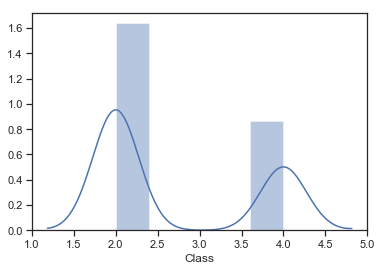

In [196]:
import seaborn as sns
%matplotlib inline
sns.distplot(df_out['Class'])

### convert the datatype of Bare Nuclei to `int`

In [197]:
df_out['Bare Nuclei'] = df_out['Bare Nuclei'].astype('int64')

print (df_out.dtypes)

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object


### Standardization of Data (Use Standard Scaler)

In [198]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_out))

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [199]:
scaled_data.columns = df_out.columns
scaled_data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,-0.725397
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,-0.725397
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

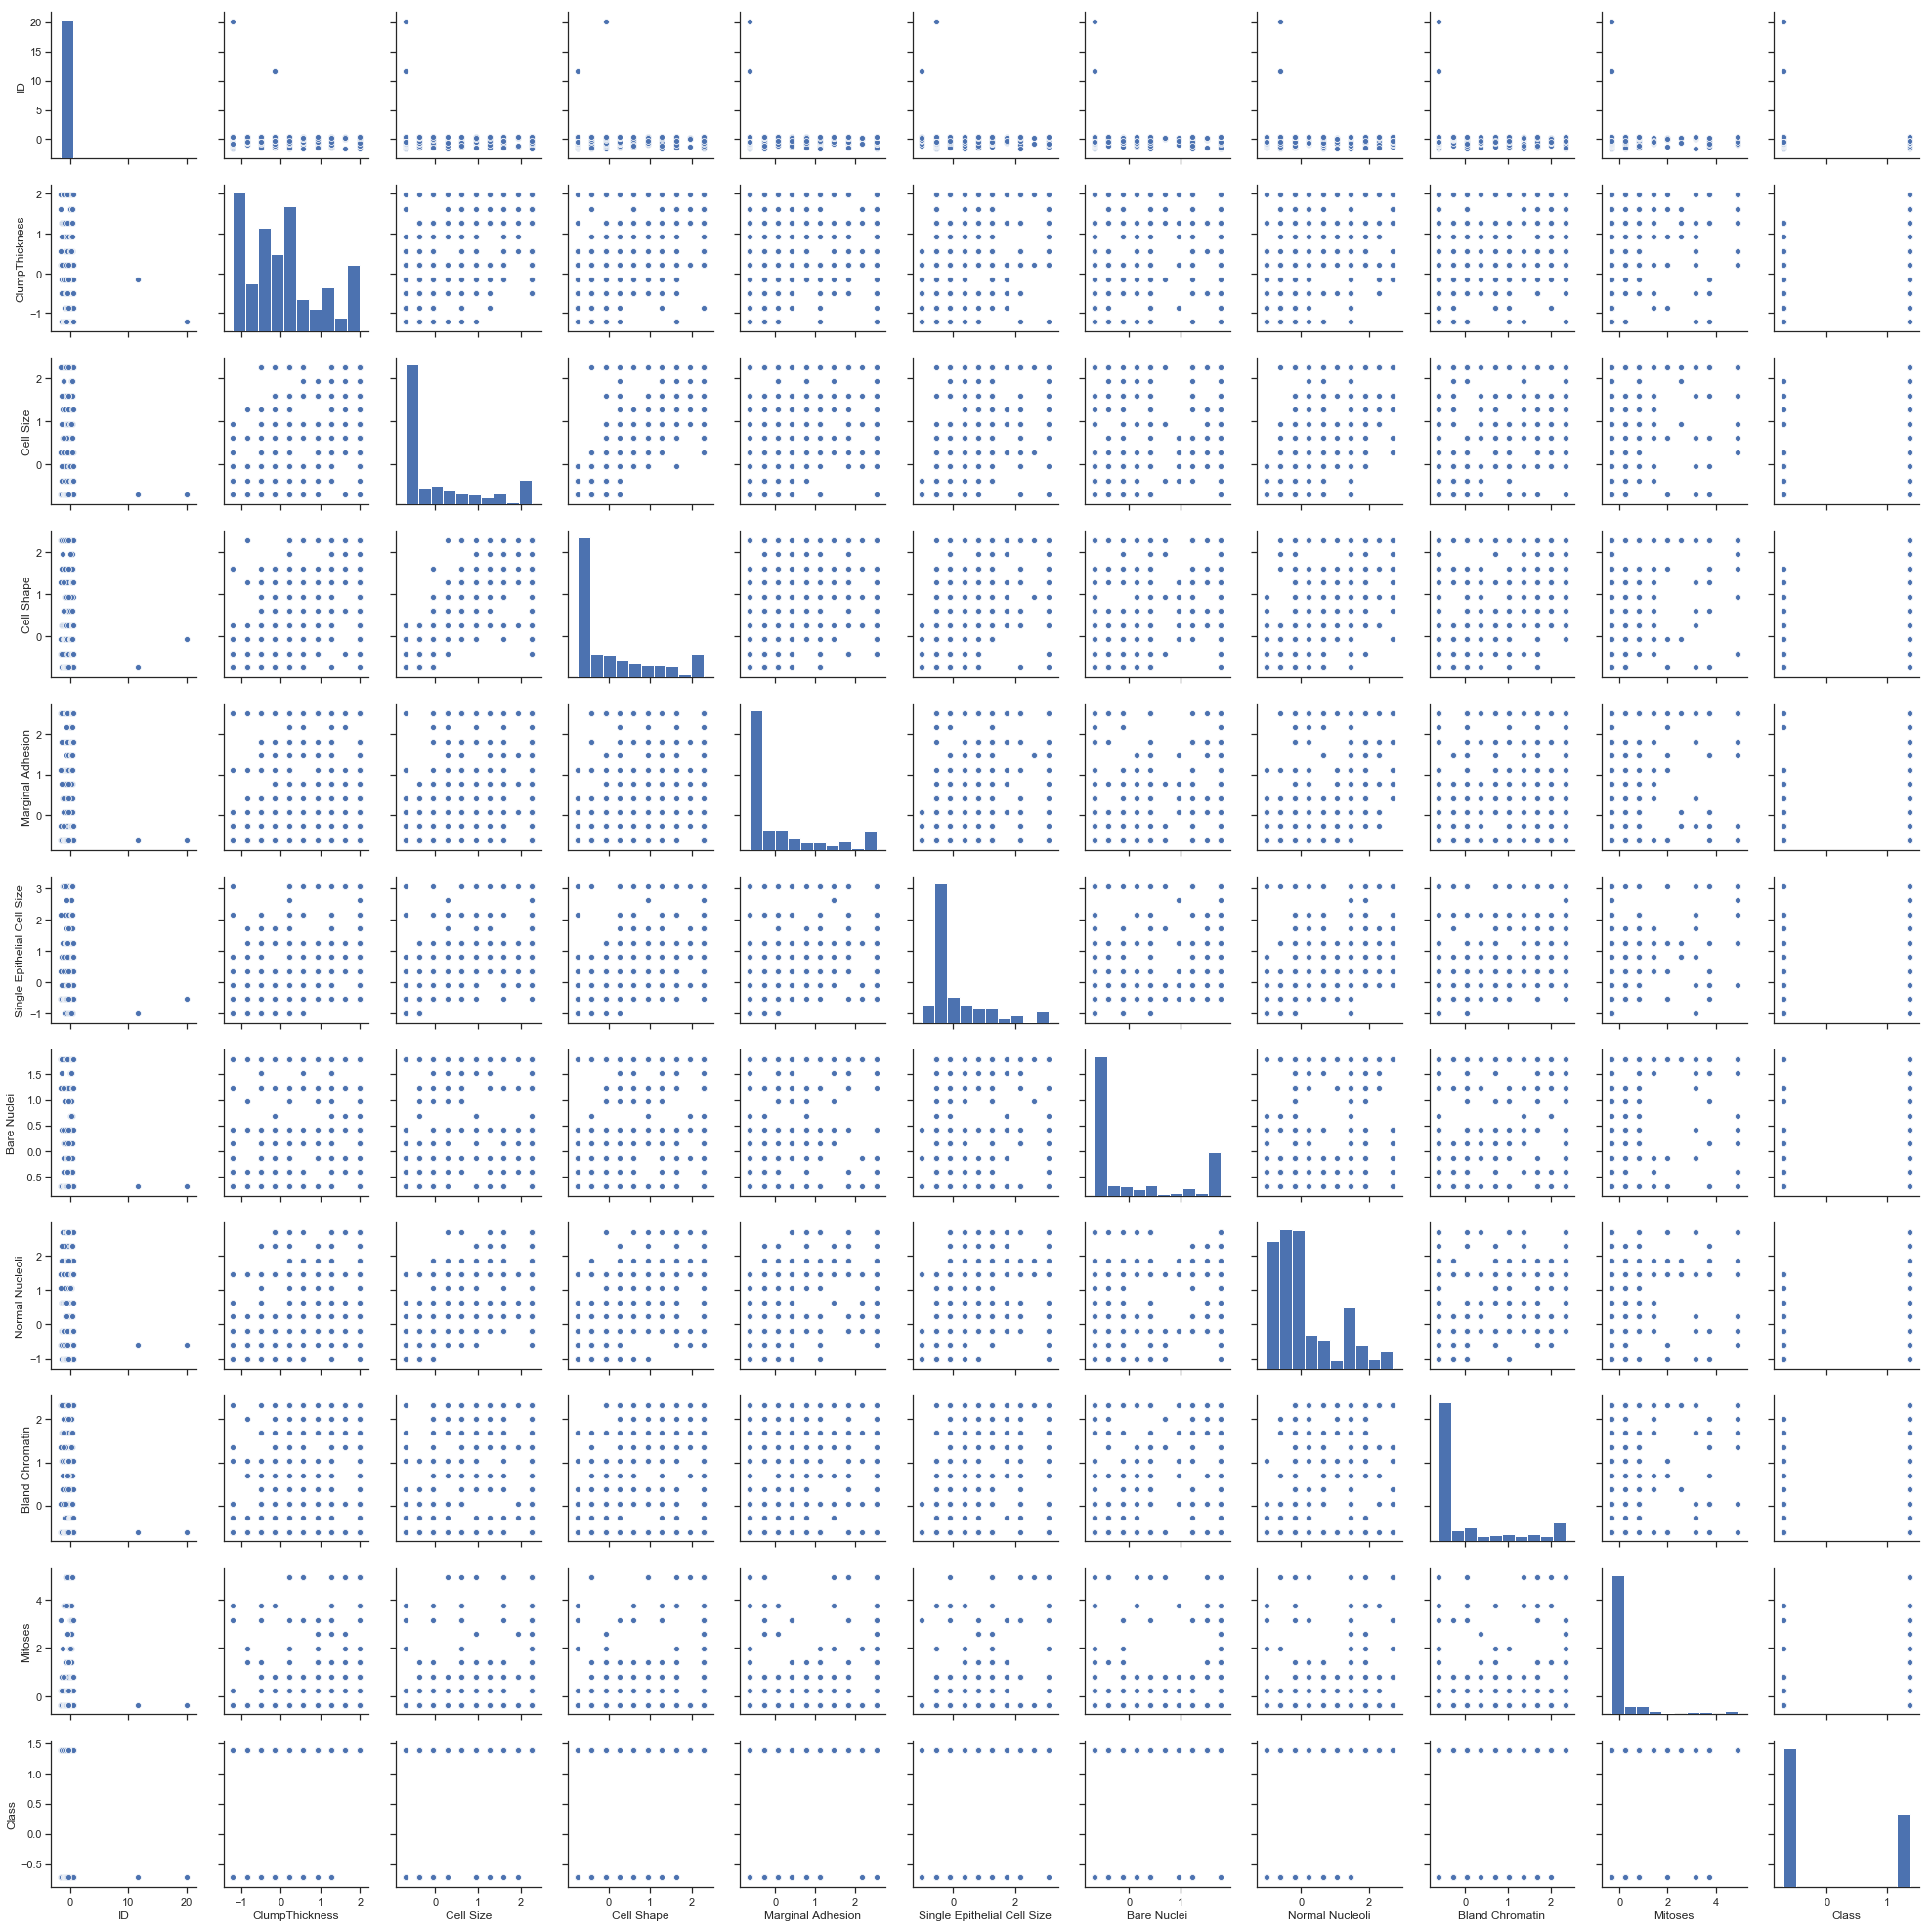

In [200]:
import seaborn as sns
sns.pairplot(scaled_data)


In [ ]:
#pd.plotting.scatter_matrix(scaled_data, figsize=(100,10))

In [ ]:
# From pair plot, a strong linear relationship can be seen between Class Size and Class Shape
# From pair plot, Class Size has a good correlation with Class Shape

### Divide the dataset into feature set and target set

In [206]:


y_bc = scaled_data['Class']
y_bc = y_bc.astype('str')
# From pair plot, Class Size has a good correlation with Class Shape; hence removing Class Size to avoid Multi COllinearity

# Exclude Id, Class, Class Size 

X_bc = scaled_data.drop('ID', axis=1)
X_bc = X_bc.drop('Cell Size', axis=1)
X_bc = X_bc.drop('Class', axis=1)
                        
print (X_bc.columns)

print ('X Shape', X_bc.shape)
print ('y Shape', y_bc.shape)
print (y_bc.head())
print (X_bc.head())

Index(['ClumpThickness', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')
X Shape (699, 8)
y Shape (699,)
0    -0.7253970453223845
1    -0.7253970453223845
2    -0.7253970453223845
3    -0.7253970453223845
4    -0.7253970453223845
Name: Class, dtype: object
   ClumpThickness  Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0        0.206936   -0.743299          -0.633247                    -0.549561   
1        0.206936    0.266875           0.768621                     1.710106   
2       -0.503866   -0.743299          -0.633247                    -0.549561   
3        0.562336    1.613773          -0.633247                    -0.097628   
4       -0.148465   -0.743299           0.067687                    -0.549561   

   Bare Nuclei  Normal Nucleoli  Bland Chromatin   Mitoses  
0    -0.686979        -0.179662        -0.611825 -0.343912  
1     1.799664 

### Divide the Training and Test sets in 70:30 

In [207]:


X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, train_size=0.7, random_state=0)

print ('X_bc train', X_bc_train.shape)
print ('X_bc test', X_bc_test.shape)
print ('y_bc train', y_bc_train.shape)
print ('y_bc test', y_bc_test.shape)

X_bc train (489, 8)
X_bc test (210, 8)
y_bc train (489,)
y_bc test (210,)


C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Model 1 : Implement a default Decision Tree model with no attributes

In [208]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [209]:
#y_bc = y_bc.astype('str')
#y_bc_train = y_bc_train.astype('str')
#y_bc_test = y_bc_test.astype('str')

# Train Decision Tree Classifer

clf = clf.fit(X_bc_train,y_bc_train)

### Check the feature importances of the Decision Tree model

In [211]:
coef_bc = clf.feature_importances_
print (coef_bc)
print (X_bc.columns)

print (coef_bc.shape)
print (X_bc.columns.shape)

# Looking at the coefficients, zero or low values are insignificant
# Mitoses is not even applicable
# Cell Shape is most important, infact a very strong correlation between outcome and Cell shape. It should be analyzed further
# Good/Strong relation to BAre Nuclie. We also need to analyze if updating missing values had any implication
# OThers look low


[0.04532217 0.69892774 0.0167765  0.01266677 0.16605645 0.02460763
 0.03564275 0.        ]
Index(['ClumpThickness', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')
(8,)
(8,)


### Check the training & test accuracy of model 1 

In [212]:
from sklearn import metrics

In [213]:
#Predict the response for train dataset
y_bc_train_pred = clf.predict(X_bc_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy: Train",metrics.accuracy_score(y_bc_train, y_bc_train_pred))


Accuracy: Train 1.0


In [214]:
# Looks overfit model

In [215]:
#Predict the response for test dataset
y_bc_test_pred = clf.predict(X_bc_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy: Test",metrics.accuracy_score(y_bc_test, y_bc_test_pred))

Accuracy: Test 0.9333333333333333


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [216]:
# Since Model 1 is overfit, we need to look at ways to generalize it

# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5)

# Train Decision Tree Classifer
clf1 = clf1.fit(X_bc_train,y_bc_train)

### Check the training & test accuracy of model 2

In [218]:
#Predict the response for train dataset
y_bc_train_pred1 = clf1.predict(X_bc_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy: Train",metrics.accuracy_score(y_bc_train, y_bc_train_pred1))

#Predict the response for test dataset
y_bc_test_pred1 = clf1.predict(X_bc_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy: Test",metrics.accuracy_score(y_bc_test, y_bc_test_pred1))

# This model looks better as training accuracy has been reduced without compromising test accuracy

Accuracy: Train 0.9693251533742331
Accuracy: Test 0.9238095238095239


### Print the confusion matrix of model 1 and model 2

In [219]:
metrics.confusion_matrix (y_bc_test, y_bc_test_pred)

array([[124,  11],
       [  3,  72]], dtype=int64)

In [220]:
metrics.confusion_matrix (y_bc_test, y_bc_test_pred1)

array([[122,  13],
       [  3,  72]], dtype=int64)